<a href="https://colab.research.google.com/github/unawuyou-create/Dissertation/blob/main/3.3%20REPEATED_Purchase_Positive_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Let's import data first
# Run the code and upload the csv file from your laptop
from google.colab import files
uploaded = files.upload()

Saving Repeatedpurchase_review.xlsx to Repeatedpurchase_review.xlsx


In [3]:
import pandas as pd
df = pd.read_excel("Repeatedpurchase_review.xlsx")
data = 'Repeatedpurchase_review.xlsx' # change the xlsx file name to your file name that you uploaded
df = pd.read_excel(data)
df=df[(df["rating"] == 4) | (df["rating"] == 5)]

df.head()

,Review,User_id,Title,rating,Date
0,Compare the Market provided the platform for m...,RB,Compare the Market performed.,5,"June 14, 2025"
1,Once you have filled in all your relevant deta...,PW,Insurance quotes made easy,5,"June 12, 2025"
2,All my details were stored from previous so I ...,KB,All my details were stored from…,5,"June 17, 2025"
3,I came to you for prices quotes for the insura...,TM,Great quotes in seconds,5,"June 11, 2025"
4,Great that I dont need to add all my details a...,JU,Simples,5,"June 15, 2025"


In [4]:
len(df)

2880

In [5]:
target_column = 'Title'

In [6]:
# Text cleaning
!pip install contractions
import re
import string
import contractions

# drop data with missing values in the target' column
df = df.dropna(subset=[target_column])

# drop duplicate review content
df = df.drop_duplicates(subset=[target_column])

# remove contraction
df[target_column] = df[target_column].map(lambda x: contractions.fix(x))

# convert the relevant column to lowercase
df[target_column] = df[target_column].str.lower()

# Remove non-word characters, so numbers and ___ etc
df[target_column] = df[target_column].str.replace("[^A-Za-z]", " ", regex = True)

# Remove url link
df[target_column] = df[target_column].apply(lambda x: re.sub('http://\S+|https://\S+', '', x))

# Remove email address
df[target_column] = df[target_column].map(lambda x: re.sub('\S*@\S*\s?', '', x))

# Remove emoji
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"

                      "]+", re.UNICODE)

df[target_column] = df[target_column].map(lambda x: re.sub(emoj, '', x))

# Remove punctuation
df[target_column] = df[target_column].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

# Remove overspace
df[target_column] = df[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

<>:23: SyntaxWarning: invalid escape sequence '\S'
<>:26: SyntaxWarning: invalid escape sequence '\S'
<>:57: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\S'
<>:26: SyntaxWarning: invalid escape sequence '\S'
<>:57: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3370795319.py:23: SyntaxWarning: invalid escape sequence '\S'
  df[target_column] = df[target_column].apply(lambda x: re.sub('http://\S+|https://\S+', '', x))
/tmp/ipython-input-3370795319.py:26: SyntaxWarning: invalid escape sequence '\S'
  df[target_column] = df[target_column].map(lambda x: re.sub('\S*@\S*\s?', '', x))
/tmp/ipython-input-3370795319.py:57: SyntaxWarning: invalid escape sequence '\s'
  df[target_column] = df[target_column].map(lambda x: re.sub('\s{2,}', " ", x))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00


In [7]:
# Text transformation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# create a list of the contents from the target column
words = df[target_column].tolist()

# tokenise the words
word_tokens = []
for content in words:
    word_tokens.append(word_tokenize(content))

# remove stop words
stop_words = stopwords.words('english')
stop_words.extend(['get','go','good','also','love','well','make','come','easy','use','insurance']) #add more stopwords here
tokens_without_stopwords = [] # create a new list with stop words removed
for review in word_tokens:
    tokens_without_stopwords.append([w for w in review if not w in stop_words])


# lemmatisation
nlp = spacy.load("en_core_web_sm") # Load the spaCy model

data_lemmatised = []
for review in tokens_without_stopwords:
    doc = nlp(" ".join(review)) # Process the text with spaCy
    data_lemmatised.append([w.lemma_ for w in doc if w.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV']]) # keeping only noun, adj, vb, adv

rejoin = []
for content in data_lemmatised:
    x = " ".join(content) # join the text back together
    rejoin.append(x)

# add the reformed text to the data frame
df['cleaned_review'] = rejoin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [8]:
df.head()

,Review,User_id,Title,rating,Date,cleaned_review
0,Compare the Market provided the platform for m...,RB,compare the market performed,5,"June 14, 2025",compare market perform
1,Once you have filled in all your relevant deta...,PW,insurance quotes made easy,5,"June 12, 2025",quote make
2,All my details were stored from previous so I ...,KB,all my details were stored from,5,"June 17, 2025",detail store
3,I came to you for prices quotes for the insura...,TM,great quotes in seconds,5,"June 11, 2025",great quote second
4,Great that I dont need to add all my details a...,JU,simples,5,"June 15, 2025",simple


In [9]:
# We can use the same process to creat document term matrix by considering the importance of the words
# Here we will use TfidfVectorizer() from scikit-learn to convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

# set vectorizer - CountVectorizer for word counts
tfidfvectorizer = TfidfVectorizer()

# create an array of word counts
vec = tfidfvectorizer.fit_transform(df.cleaned_review)

# convert this to a dataframe
tfidf = pd.DataFrame(vec.toarray(), columns=tfidfvectorizer.get_feature_names_out())

# set a threshold to drop infrequent words. here we set overall mean as the threshold. you can change the threshold to control the number of terms
threshold = tfidf.mean().mean()

# drop words based on the threshold
tfidf = tfidf.drop(tfidf.mean()[tfidf.mean() < threshold].index.values, axis=1) # Here find out the word with average word count lower than the threshold and drop them

# join the two datasets together
# tfidf = df.join(tfidf, how='left')

tfidf.head()

,access,always,amazing,app,back,brilliant,building,buy,car,change,...,value,want,way,website,well,win,work,worth,year,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# create a list of words sorted by tfidf score descending
word_tfidf = tfidf.sum(axis=0)
word_tfidf_df = pd.DataFrame({'word': word_tfidf.index, 'tfidf': word_tfidf.values})
word_tfidf_df = word_tfidf_df.sort_values(by='tfidf', ascending=False)
word_tfidf_df.head(10) # change number in head() to control the top n

,word,tfidf
49,great,112.373535
18,compare,101.144856
111,service,93.537490
106,save,91.217724
92,quick,86.264841
115,site,83.445032
8,car,82.136514
70,market,69.329746
40,find,64.830718
86,price,63.274265


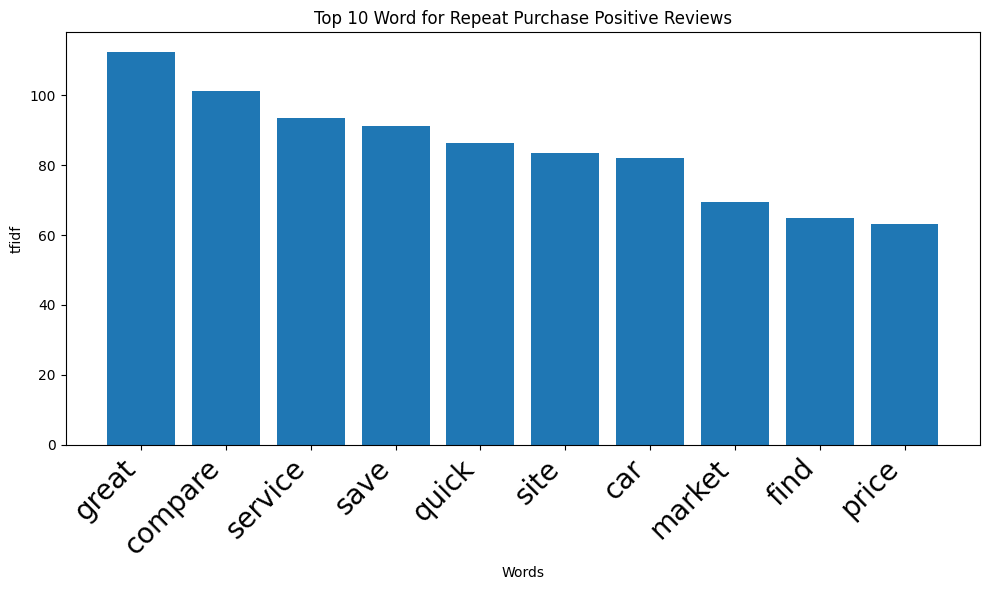

In [11]:
# create a bar showing top 10 words sorted by counts descending

import matplotlib.pyplot as plt

word_tfidf = tfidf.sum(axis=0)
word_tfidf_df = pd.DataFrame({'word': word_tfidf.index, 'tfidf': word_tfidf.values}).sort_values(by='tfidf', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(word_tfidf_df['word'].head(10), word_tfidf_df['tfidf'].head(10)) # change number in head() to control the top n
plt.xlabel("Words")
plt.ylabel("tfidf")
plt.title("Top 10 Word for Repeat Purchase Positive Reviews")
plt.xticks(rotation=45, ha='right',fontsize=20)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig("pos_top_10_tfidf_words.png", dpi=300, bbox_inches='tight')
plt.show()

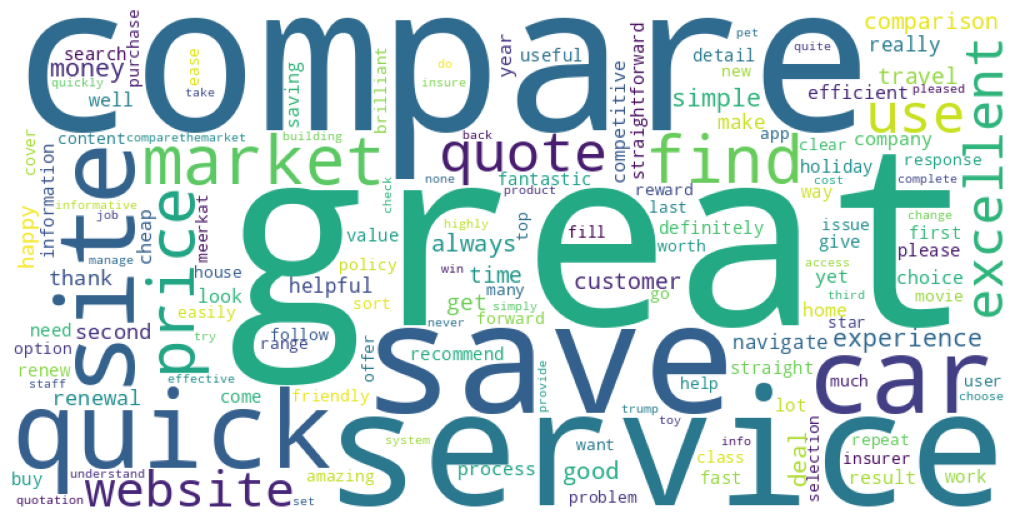

In [12]:
# create a wordcloud with tfidfvectoriser results
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_tfidf = tfidf.sum(axis=0)  # Sum tfidf across all documents

# create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("pos_tfidf_wordcloud.png", dpi=300, bbox_inches='tight')
plt.show()